In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Week-6

**Note:**: 

- For questions that involve plotting, just enter $0$ as the answer in the portal.



## Dataset

Run the cell given below to generate the data-matrix $X$ and target vector $y$. $X$ is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. $y$ is of shape $(n,)$. You will be using this dataset for the rest of the assignment. 

**Do not edit this cell.**

In [2]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y = True)

# set the random seed value to 0
np.random.seed(0)

## Problem 1
How many samples are there in the dataset?



## Solution

In [3]:
# Write your solution code here
X.shape[0]

442

## Problem 2

How many features are there in the dataset?



## Solution

In [4]:
# Write your solution code here
X.shape[1], y.shape

(10, (442,))

## Problem 3
Write a function `shuffle_data(X, y)` that returns the shuffled $X$ and $y$. 

Note that it should shuffle the data pairs $(x_i, y_i)$. 

What will be the mean of the first 5 values in $y$?



In [5]:
# Write your solution code here
def shuffle_data(X, y):
    perm = np.random.permutation(len(X))

    X_shuffled = X[perm]
    y_shuffled = y[perm]

    return X_shuffled, y_shuffled

In [6]:
X_shuf, y_shuf = shuffle_data(X, y)

np.mean(y_shuf[:5])

180.4

## Problem 4

Write a function `train_test_split(X, y, test_size)` that divides the data (X, y) into $X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ respectively as per test_size which should be a value between 0 and 1.

That is, if test_size = $t$, then `int(t*n)` data points should go to test and the remaining data points should go to train.

$X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ should be returned by the function.

Set the test_size to be 0.25 and output the sum of all y values settling in $y_{test}$.








In [7]:
# Write your solution code here
def train_test_split(X, y, test_size):
    n = int((1-test_size) * len(X)) + 1

    return X[:n], X[n:], y[:n], y[n:]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_shuf, y_shuf, 0.25)

In [9]:
np.sum(y_test)

16960.0

## Problem 5

What are the shapes of $X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ respectively?



In [10]:
# Write your solution code here
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((332, 10), (110, 10), (332,), (110,))

## Problem 6
Add a dummy feature, i.e., a column containing all 1's (as the first column) in $X_{train}$ and $X_{test}$.

Take the transpose of both $X_{train}$ and $X_{test}$.

What are the shapes of $X_{train}$ and $X_{test}$?



In [11]:
# Write your solution code here
X_train = np.vstack((np.ones((len(X_train),)), X_train.T))
X_test = np.vstack((np.ones((len(X_test),)), X_test.T))

In [12]:
X_train.shape, X_test.shape

((11, 332), (11, 110))

## Problem 7

Write a function `compute_weights(X, y)` that uses the closed form formula of linear regression and returns a weight vector.

Call this function by passing $X_{train}$ and $y_{train}$. As the dummy feature was added as the first column, the first value in the weight vector will be the intercept. What is its value (rounded to one decimal place)?



In [13]:
# Write your solution code here
def compute_weights(X, y):
    return np.linalg.pinv(X@X.T)@X@y

In [14]:
w = compute_weights(X_train, y_train)

In [15]:
w[0]

150.80818854686095

## Problem 8

Write a function `MSE(X, y, w)` that returns the mean squared error for the given `X`, `y` as per `w` values.

Using this function, compute the train error and test error.

Note: Here `y` is the true `y` for `X`.

Compute both train and test error. 

What is the value of test error?


In [16]:
# Write your solution code here
def MSE(X, y, w):
    return np.mean((X.T@w - y) ** 2)

In [17]:
train_error = MSE(X_train, y_train, w)
test_error = MSE(X_test, y_test, w)

In [18]:
test_error

2745.4301111743557

## Problem 9

Write a function `compute_weights_ridge(X, y)` that uses the closed form formula of Ridge regression and returns a weight vector.

Call this function by passing  `X_train`, `y_train` and 0.3 as the value of regularization strength. 


Find the sum of values in the weight vector obtained. How much reduction in total sum of weights is achieved with respect to the the weight vector obtained from 'plain' linear regression (without regularization) computed earlier.


In [19]:
# Write your solution code here
def compute_weights_ridge(X, y, lamb):
    return np.linalg.pinv(X@X.T + lamb * np.identity(X.shape[0]))@X@y

In [20]:
w_ridge = compute_weights_ridge(X_train, y_train, 0.3)

In [21]:
np.sum(w) - np.sum(w_ridge)

680.0350238507108

## Problem 10

Compute the train error and test error. What is their absolute difference?



In [22]:
# Write your solution code here
train_error_ridge = MSE(X_train, y_train, w_ridge)
test_error_ridge = MSE(X_test, y_test, w_ridge)

In [23]:
abs(train_error_ridge - test_error_ridge)

99.46973870899637

## Problem 11

Use 10 different values between 0 and 5 as the regularization strength and keep a record of the weight vectors obtained for each. Further, calculate the sum of weights for each weight vector.

Plot these sums of weights (on y-axis) with respect to the regularization strength (on x-axis) and observe the reduction in (sum of) weights.



In [24]:
# Write your solution code here
w_ridges = []
lamb = 0
lambs = []

while lamb < 5:
    lambs.append(lamb)
    w_ridges.append(np.sum(compute_weights_ridge(X_train, y_train, lamb)))
    lamb += 0.5

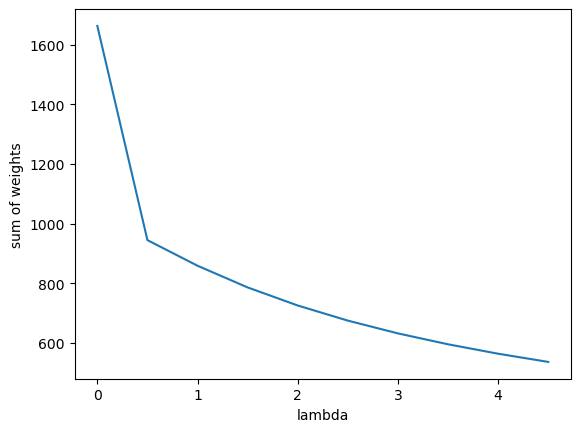

In [25]:
plt.plot(lambs, w_ridges)
plt.xlabel("lambda")
plt.ylabel("sum of weights")
plt.show()